# Trabajo práctico integrador

**Nombre**: Fabian Dario Caihuara Sossa

## Primera Parte (Clase 1 y 2)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Primer ejercicio

Dada una matriz en formato *numpy array*, donde cada fila de la matriz representa un vector matemático, se requiere computar las normas $l_0$, $l_1$, $l_2$, $l_{\infty}$, según la siguientes definiciones:

\begin{equation}
    ||\mathbf{x}||^{p} = \bigg(\sum_{j=1}^{n}{|x_i|^p}\bigg)^{\frac{1}{p}}
\end{equation}

con los casos especiales para $p=0$ y $p=\infty$ siendo:

\begin{equation}
    \begin{array}{rcl}
        ||\mathbf{x}||_0 & = & \bigg(\sum_{j=1 \wedge x_j != 0}{|x_i|}\bigg)\\
        ||\mathbf{x}||_{\infty} & = & \max_{i}{|x_i|}\\
    \end{array}
\end{equation}

In [4]:
def norma_l(mat: np.array, ord):
    np.seterr(divide='ignore', invalid='ignore')
    if(ord == 0):
        return np.nan_to_num(mat/mat).sum(axis=1)
    elif (ord == np.inf):
        return np.abs(mat).max(axis=1)
    else:
        return np.power(np.power(np.abs(mat), ord).sum(axis=1), 1/ord)

In [5]:

datos = np.array([[-10, 0, 3, 4],[5, 7, 0, 0],[2, 3, 4, 5]])
print('La matriz con los vectores de valores es: ')
print(datos)
print('Resultado del calculo de norma l: \n')
print(norma_l(datos, 0))
print(norma_l(datos, 1))
print(norma_l(datos, 2))
print(norma_l(datos, np.inf))


La matriz con los vectores de valores es: 
[[-10   0   3   4]
 [  5   7   0   0]
 [  2   3   4   5]]
Resultado del calculo de norma l: 

[3. 2. 4.]
[17. 12. 14.]
[11.18033989  8.60232527  7.34846923]
[10  7  5]


### Segundo Ejercicio

En clasificación contamos con dos arreglos, la “verdad” y la “predicción”. Cada elemento de los arreglos pueden tomar dos valores, “True” (representado por 1) y “False” (representado por 0). Entonces podemos definir 4 variables:

* True Positive (TP): El valor verdadero es 1 y el valor predicho es 1
* True Negative (TN): El valor verdadero es 0 y el valor predicho es 0
* False Positive (FP): El valor verdadero es 0 y el valor predicho es 1
* False Negative (FN): El valor verdadero es 1 y el valor predicho es 0

A partir de esto definimos:

* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* Accuracy = (TP + TN) / (TP + TN + FP + FN)
 
Calcular las 3 métricas con Numpy y operaciones vectorizadas.

In [6]:
truth = np.array([1,1,0,1,1,1,0,0,0,1])
prediction = np.array([1,1,1,1,0,0,1,1,0,0])

TP = (truth * prediction).sum()
TN = np.count_nonzero([(truth - prediction) == 0])
FP = np.count_nonzero([(truth - prediction) == -1])
FN = np.count_nonzero([(truth - prediction) == 1])

print('Precision = TP / (TP + FP) :', TP / (TP + FP))
print('Recall = TP / (TP + FN) :', TP / (TP + FN))
print('Accuracy = (TP + TN) / (TP + TN + FP + FN) :', (TP + TN) / (TP + TN + FP + FN))

Precision = TP / (TP + FP) : 0.5
Recall = TP / (TP + FN) : 0.5
Accuracy = (TP + TN) / (TP + TN + FP + FN) : 0.5384615384615384


### Tercer y Cuarto Ejercicio

Para este ejercicio vamos a considerar los siguientes datasets:

* [HAR](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) (Ejercicio 3)
* [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) (Ejercicio 4)

1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
2. Gráficar la variación acumulada para cada caso.
3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=6$ (ej 3) y $k=10$ (ej 4). Luego en ambos casos probar con $k=2$.
4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.
5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

In [17]:
import os
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_train = pd.DataFrame(np.loadtxt(os.path.join('data/HAR_Dataset/train/', 'X_train.txt')))
y_train = pd.DataFrame(np.loadtxt(os.path.join('data/HAR_Dataset/train/', 'y_train.txt')).astype(int))

RANDOM_STATE = 17
X_train.describe()


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


#### HAR
1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
pca = PCA(n_components=0.8, random_state = RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled)

#Cantidad de componentes necesarios
X_pca.shape[1]

26

2. Gráficar la variación acumulada para cada caso.

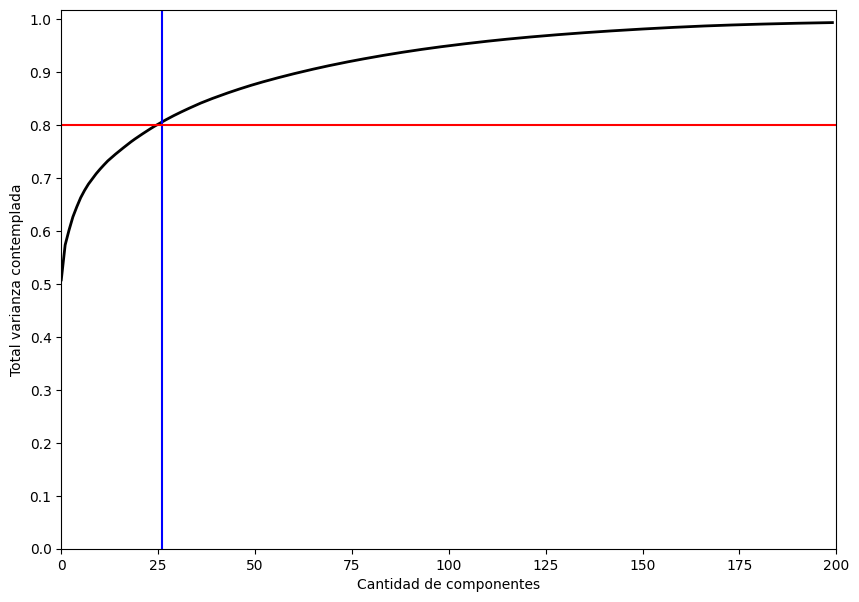

In [21]:
pca_2 = PCA(n_components=200, random_state=RANDOM_STATE).fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_2.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 200)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(26, c='b')
plt.axhline(0.8, c='r')
plt.show();

3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=6$ (ej 3) y $k=10$ (ej 4). Luego en ambos casos probar con $k=2$.

In [22]:
#KMeans k=6
kmeans_move = KMeans(n_clusters=6, n_init=100, random_state=RANDOM_STATE)
kmeans_move.fit(X_pca)
cluster6_labels = kmeans_move.labels_

#KMeans k=2
kmeans_move = KMeans(n_clusters=2, n_init=100, random_state=RANDOM_STATE)
kmeans_move.fit(X_pca)
cluster2_labels = kmeans_move.labels_

4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.

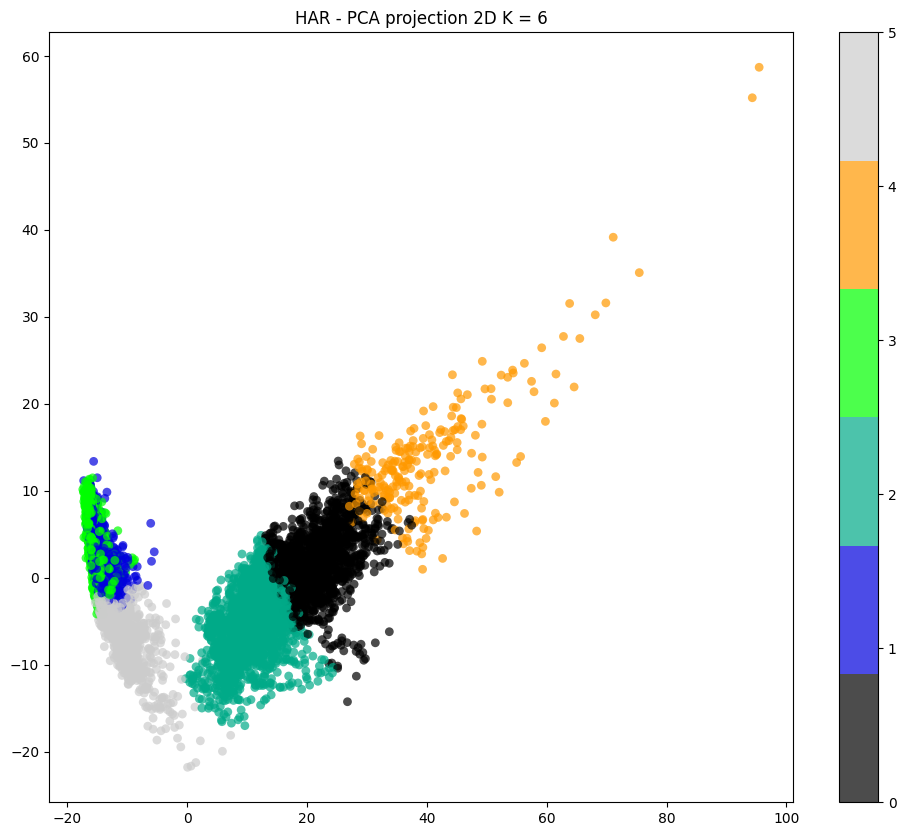

In [24]:
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster6_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('HAR - PCA projection 2D K = 6');

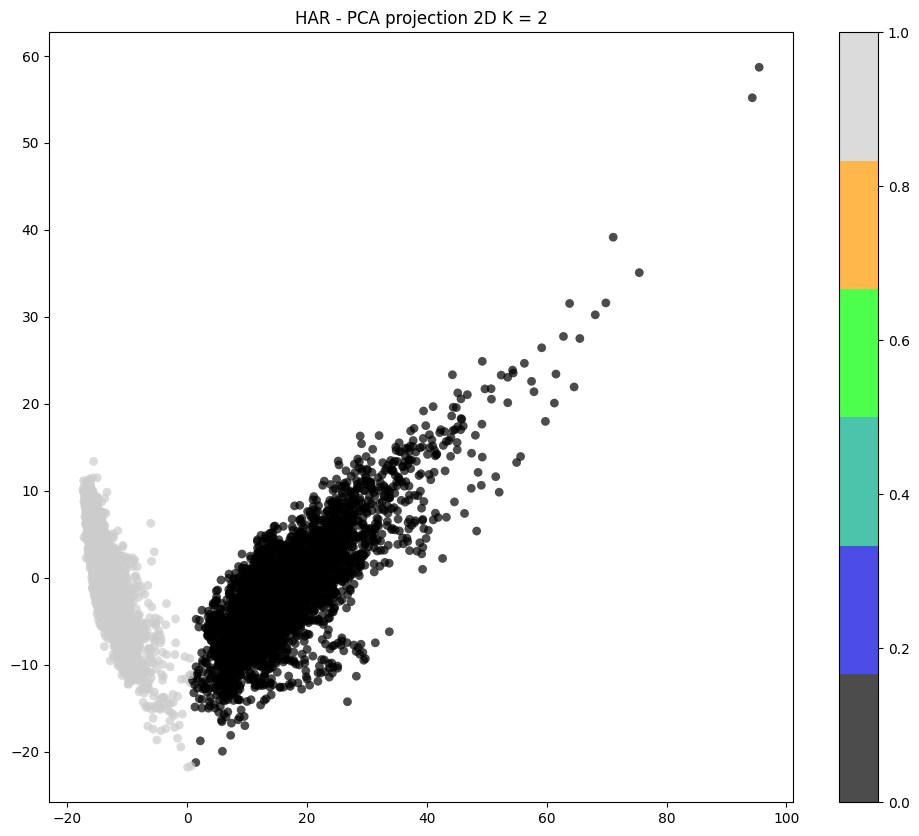

In [25]:
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster2_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('HAR - PCA projection 2D K = 2');

5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

La ganancia de usar PCA es que se reducen las dimensiones considerablemente y manteniendo el 80% de explicanilidad de la varianza, con esto realizado Kmean realiza una separacion de clases en el conjunto de datos

#### MNIST
1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?

In [34]:
X_train, y_train = load_digits(return_X_y = True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
pca = PCA(n_components=0.8, random_state = RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled)

#Cantidad de componentes necesarios
X_pca.shape[1]

21

2. Gráficar la variación acumulada para cada caso.

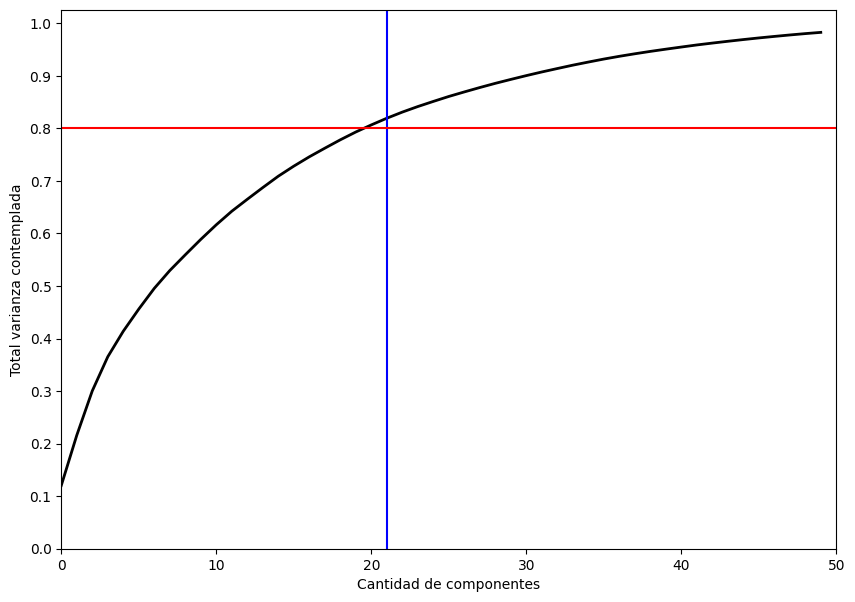

In [40]:
pca_2 = PCA(n_components=50, random_state=RANDOM_STATE).fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_2.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 50)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.8, c='r')
plt.show();

3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=6$ (ej 3) y $k=10$ (ej 4). Luego en ambos casos probar con $k=2$.

In [45]:
#KMeans k=10
kmeans_move = KMeans(n_clusters=10, n_init=100, random_state=RANDOM_STATE)
kmeans_move.fit(X_pca)
cluster6_labels = kmeans_move.labels_

#KMeans k=2
kmeans_move = KMeans(n_clusters=2, n_init=100, random_state=RANDOM_STATE)
kmeans_move.fit(X_pca)
cluster2_labels = kmeans_move.labels_

4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.

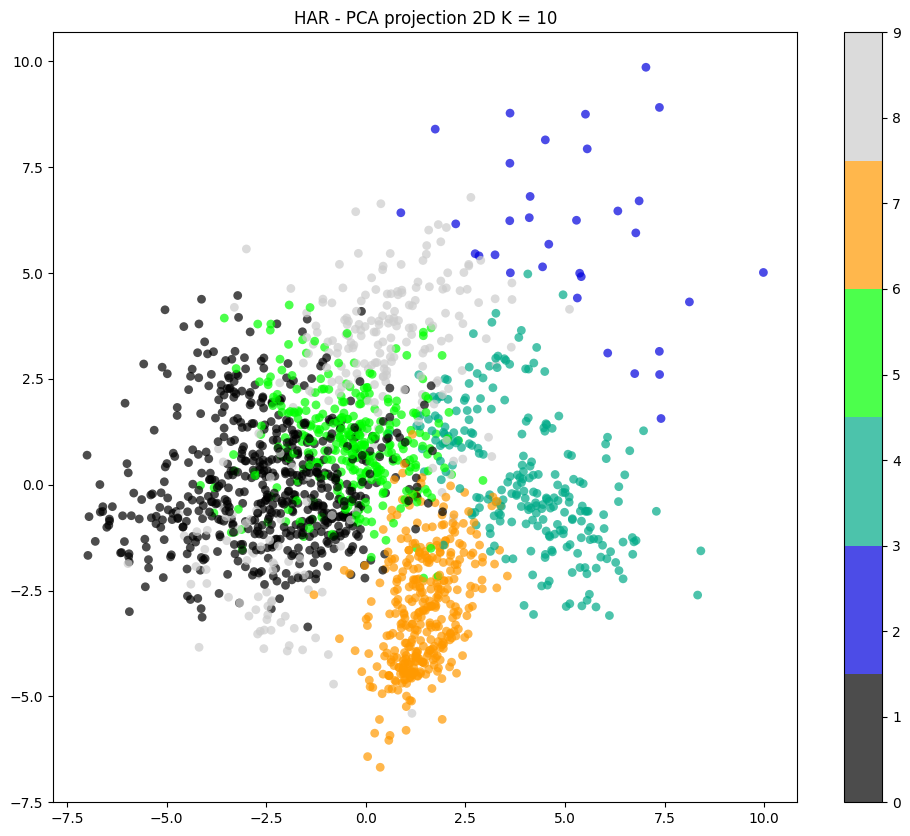

In [46]:
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster6_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('HAR - PCA projection 2D K = 10');

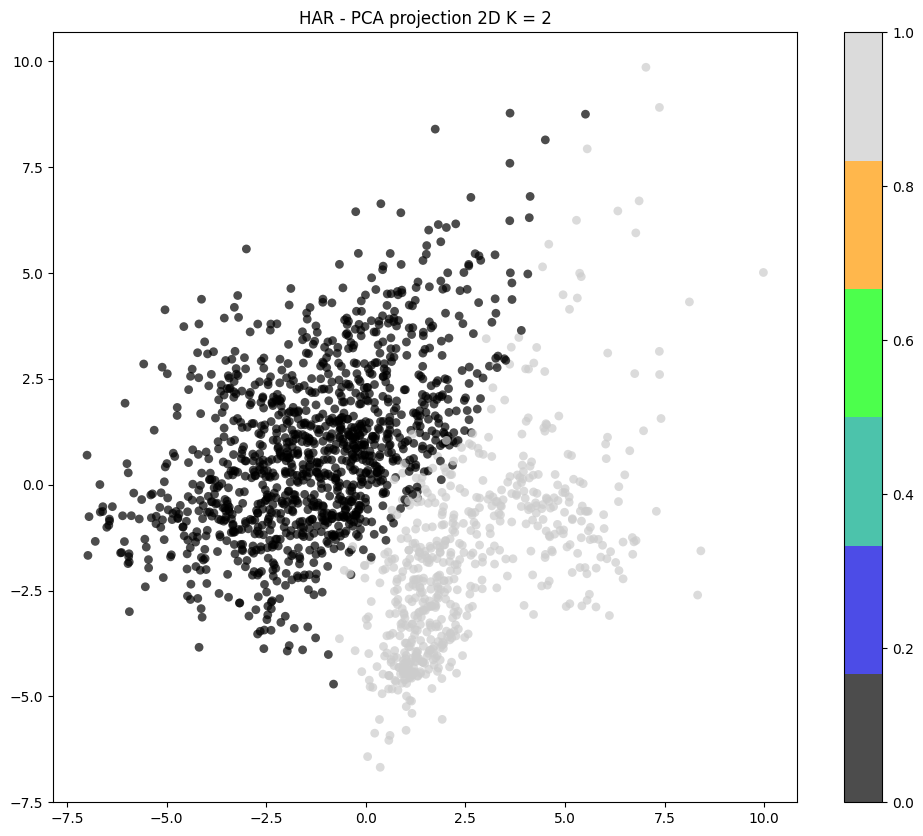

In [43]:
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster2_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('HAR - PCA projection 2D K = 2');

5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

Se logró determinar y reducir la dimensionalidad de los datos a 21 caracteristicas se observa que con k = 10 se disminuye la capacidad de separación de los datos

## Segunda Parte (Clase 3 y 4)

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression

# Evaluación de modelos de prueba
from sklearn.metrics import mean_squared_error

# Crear datasets
from sklearn.datasets import make_regression

Vamos a crear un dataset sintetico utilizando las librerias de [Sklearn Datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html), en particular nos interesa crear un problema de regresion
lineal al que podemos variarle sus parametros

In [48]:
# Creamos un dataset de prueba
X, y = make_regression(n_samples = 1000,
                       n_features = 1,
                       noise = 2,
                       n_informative = 1,
                       random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)
new_data.shape

(1000, 2)

In [49]:
df = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df.columns:
    if i ==  len(df.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df.columns = new_col

df.head()

,feature_1,target
0,-1.758739,-30.118736
1,1.031845,14.526197
2,-0.487606,-10.119305
3,0.186454,1.700188
4,0.725767,12.345314


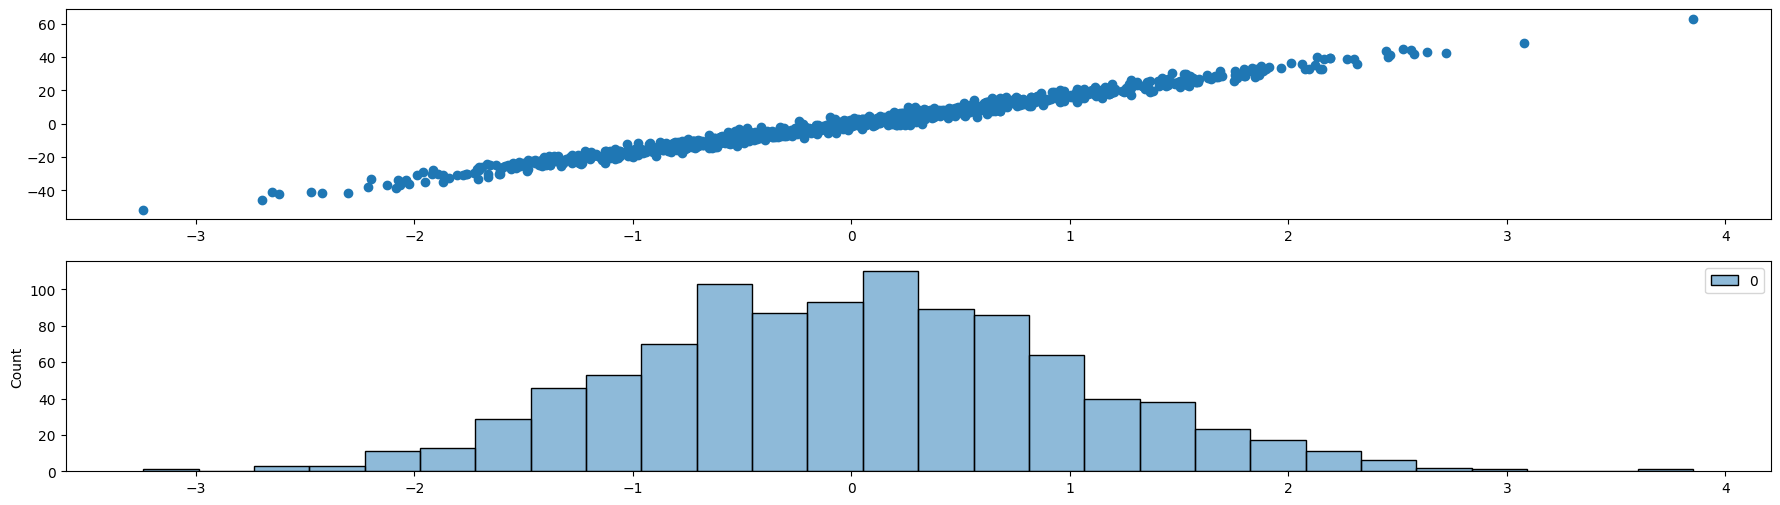

In [50]:
fig,axes = plt.subplots(2,figsize=(22,6))
axes[0].scatter(X,y)
sns.histplot(X, ax=axes[1]);

### Funciones auxiliares para generar datos anómalos

In [51]:
def generate_outliers(df: pd.DataFrame,
                     cols: list = None,
                     extreme_outlier: bool = False,
                     two_tailed: bool = False,
                     percentage: float = 0.02) -> pd.DataFrame:
  """Con esta función vamos a poder generar outliers en ciertas columnas de nuestro
  dataset. Si le damos True a _extreme_outlier_ va a generar outliers con mucho
  peso en la regresión (puede ser bilateral o unilateral segun _two_tailed_)
  """  
  seeds = np.random.randint(100, size = len(df))
  
  nsamples = np.math.floor(len(df) * percentage)
  idx_to_change = df.sample(n = nsamples).index

  cols = df.columns.tolist() if cols is None else cols

  result = df.copy(deep = True)
  
  for i,col_name in enumerate(cols):
    np.random.seed(seeds[i])

    iqr = result[col_name].quantile(0.75) - result[col_name].quantile(0.25)

    lb = result[col_name].quantile(0.25) - 1 * iqr
    ub = result[col_name].quantile(0.75) + 1 * iqr

    if two_tailed:
      outs = result[col_name].loc[(result[col_name] < lb) | (result[col_name] > ub)]
    else:
      outs = result[col_name].loc[(result[col_name] > ub)]
    
    out_size = len(outs)
    if out_size < nsamples:
      nsamples = out_size

    idx_to_change = outs.sample(nsamples, replace = False).index
    
    if extreme_outlier:
      outlier_sign = [1 if np.random.random() < 0.9 else -1 for _ in range(nsamples)]
      
      result[col_name].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result[col_name].mean(),
                                                                          high = result[col_name].max()*5,
                                                                          size = nsamples)
                                                        )
      result['target'].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result['target'].mean(),
                                                                          high = result['target'].max()*2,
                                                                          size = nsamples)
                                                        )
    else:
      samples = result[col_name].loc[idx_to_change].values
      np.random.shuffle(samples)
      result[col_name].loc[idx_to_change] = samples
  
  return result

In [52]:
df_outlier = generate_outliers(df,['feature_1'], percentage = 0.05, extreme_outlier = True, two_tailed= True)

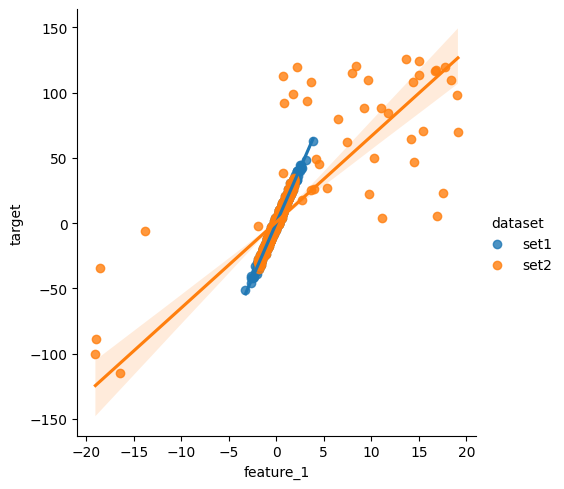

In [53]:
sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

### Quinto ejercicio

Crear una función que separe los datos en train-validation-test 70-20-10


Hints: 

* Usar Indexing y slicing
* Usar np.random.[...]

In [54]:
def split(df: pd.DataFrame, train_size: float, val_size: float, test_size: float):

    if((train_size + val_size + test_size) <= 1):
        permuted = np.random.permutation(df.shape[0])
        train = permuted[0 : int(train_size * df.shape[0])]
        test = permuted[int(train_size * df.shape[0]) : int((train_size + test_size) * df.shape[0])]
        val = permuted[int((train_size + test_size) * df.shape[0]) : int((train_size + test_size + val_size) * df.shape[0])]
        
        X_train = df.iloc[train, 0:-1]
        X_test = df.iloc[test, 0:-1]
        X_val = df.iloc[val, 0:-1]

        Y_train = df.iloc[train, -1]
        Y_test = df.iloc[test, -1]
        Y_val = df.iloc[val, -1]
        return X_train, X_val, X_test, Y_train, Y_val, Y_test
    else:
        return 'Error en los valores ingresados'

X_train, X_val, X_test, Y_train, Y_val, Y_test = split(df, 0.7, 0.2, 0.1)

   

In [56]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(700, 1)
(201, 1)
(99, 1)


### Sexto ejercicio

Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

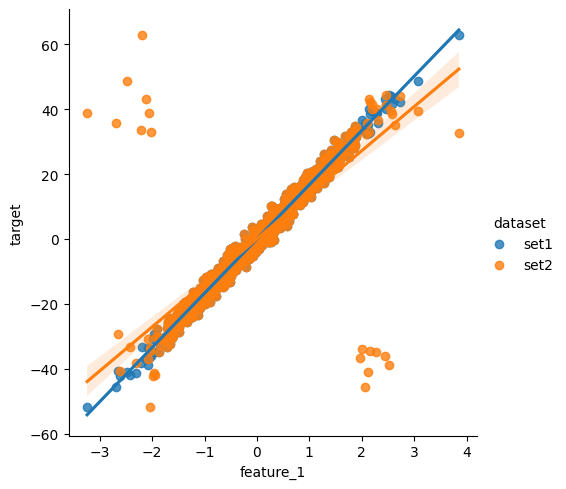

In [59]:
df_outlier_outlayer_false = generate_outliers(df,['feature_1'], percentage = 0.05, extreme_outlier = False, two_tailed= True)
sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier_outlayer_false.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

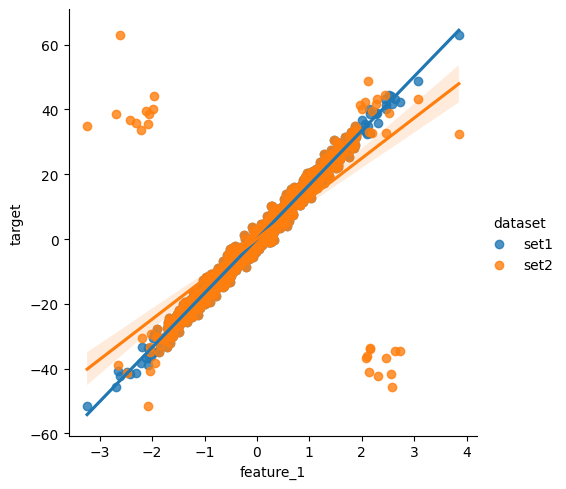

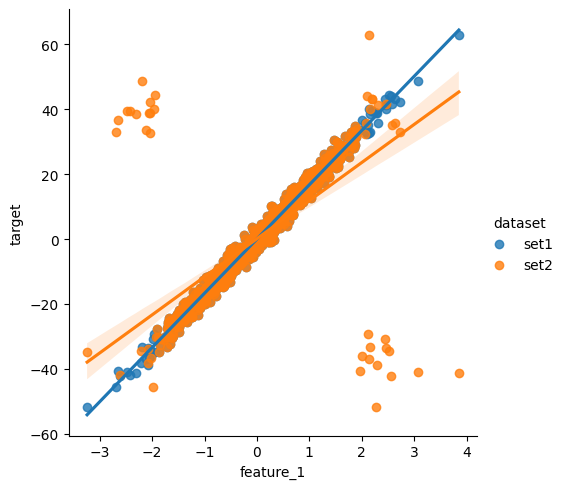

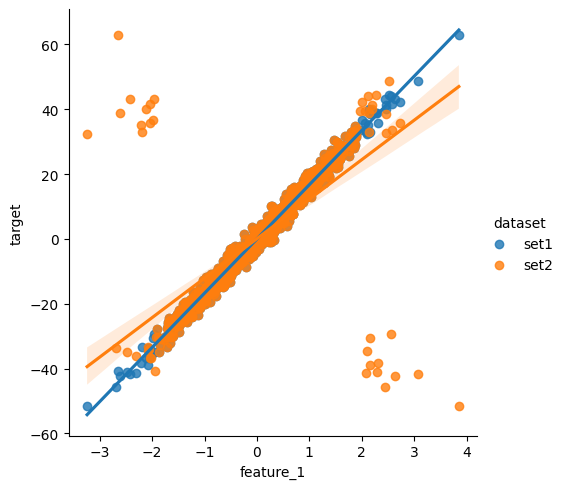

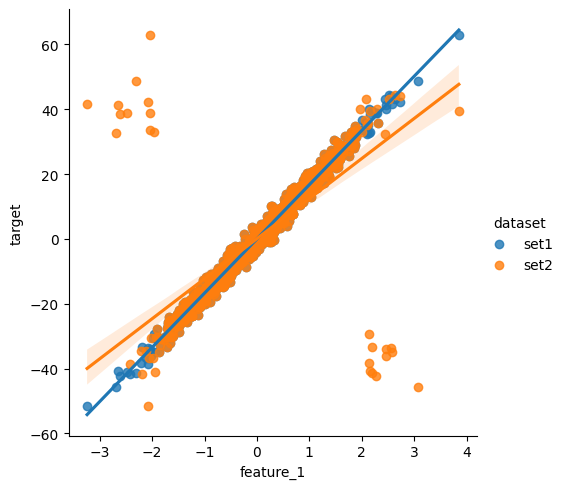

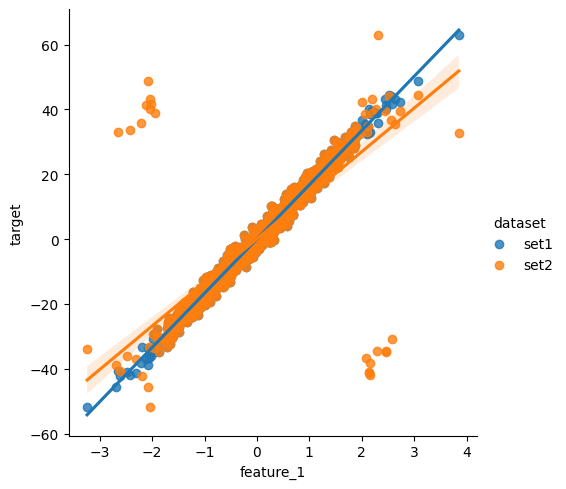

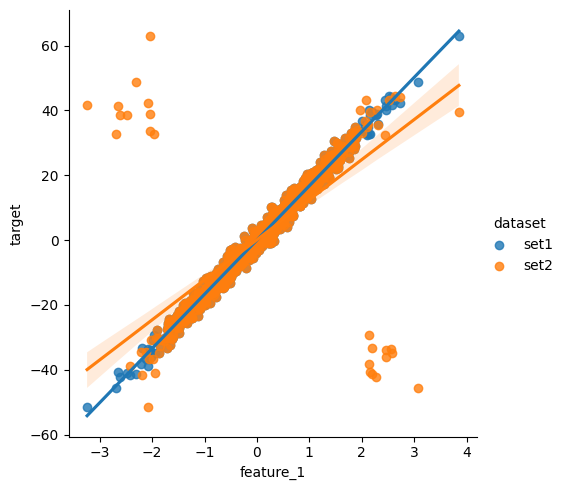

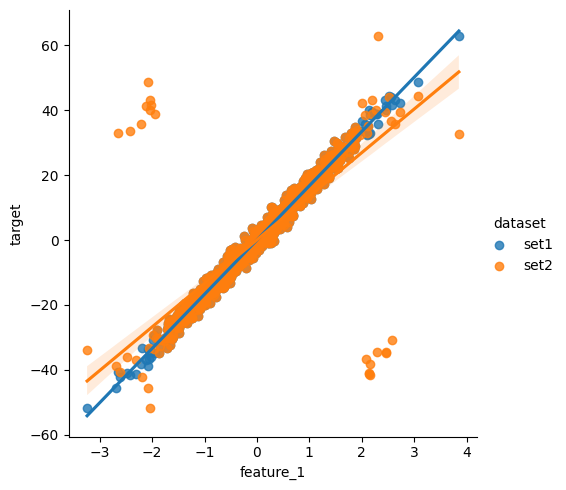

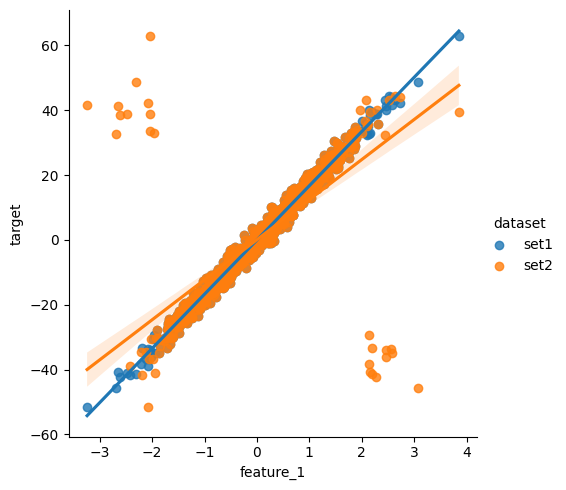

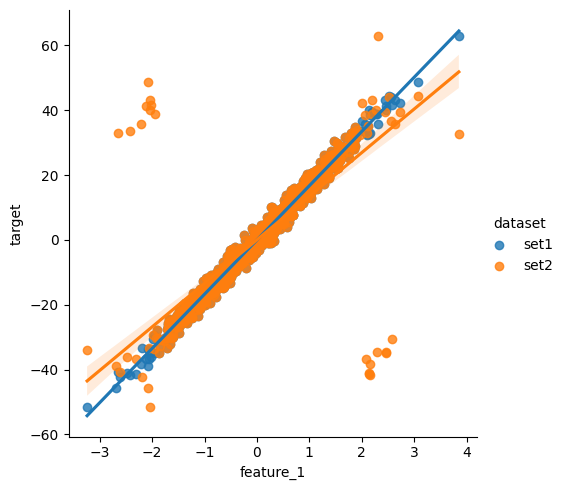

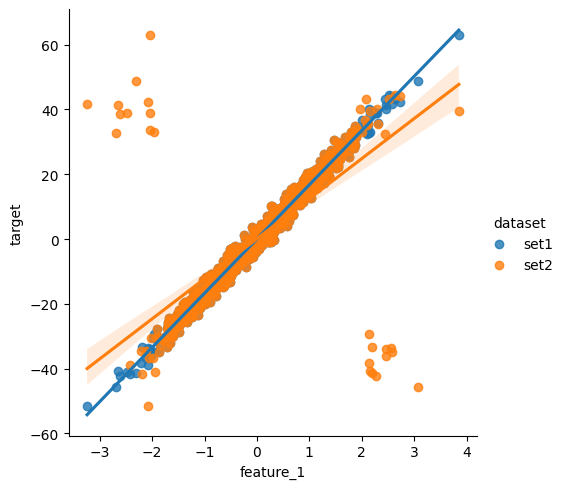

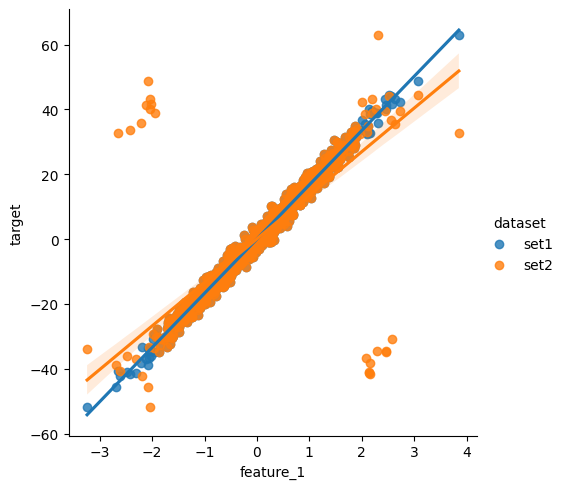

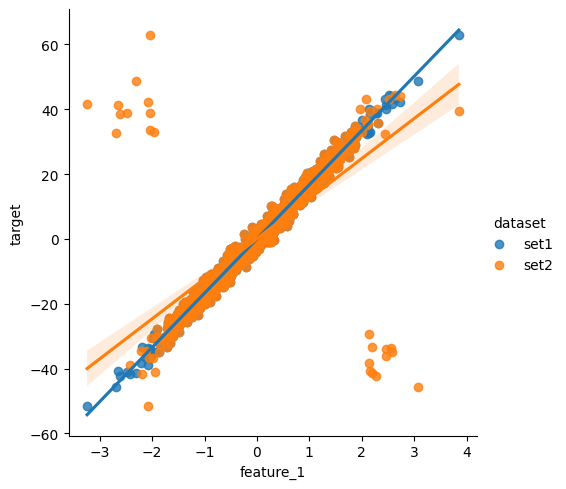

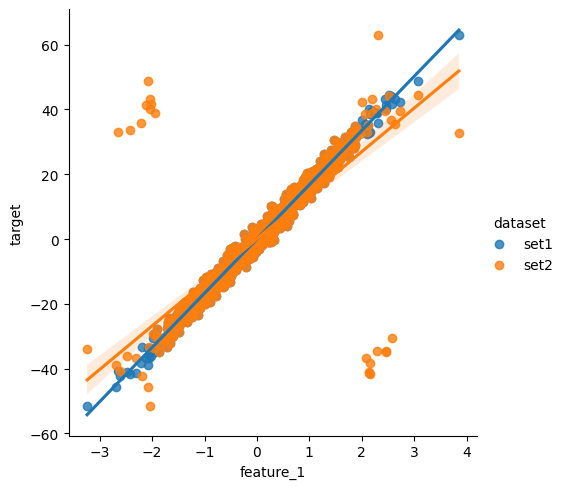

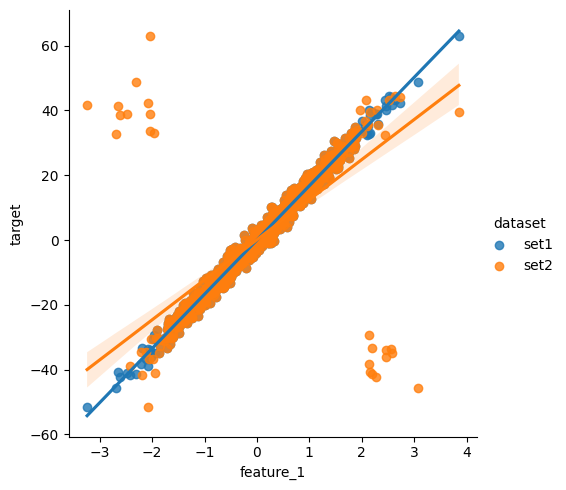

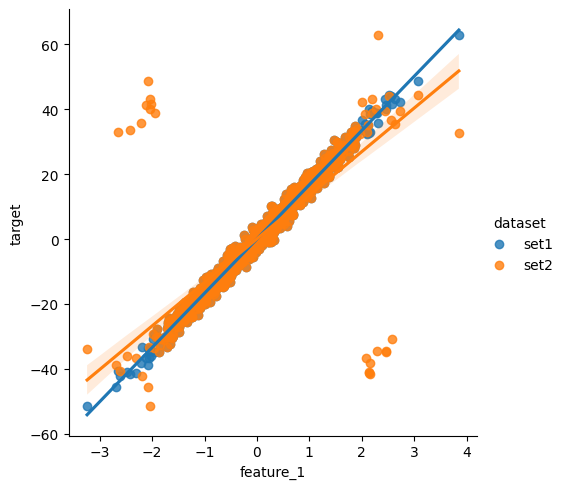

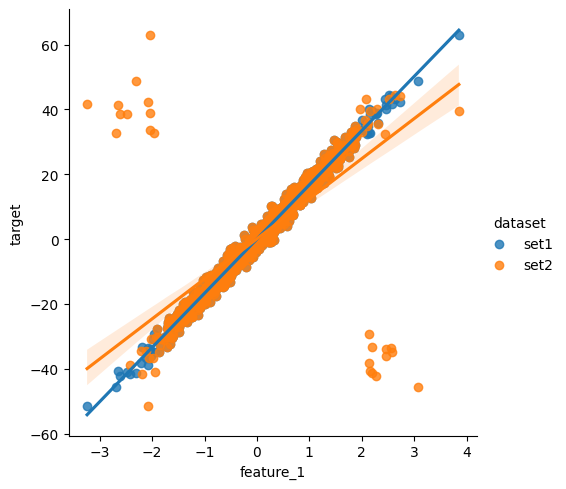

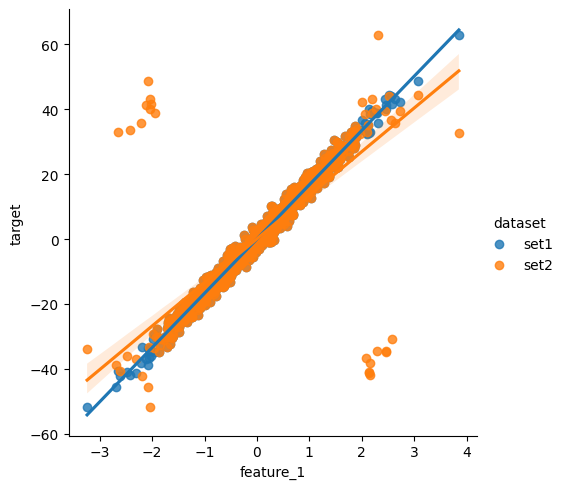

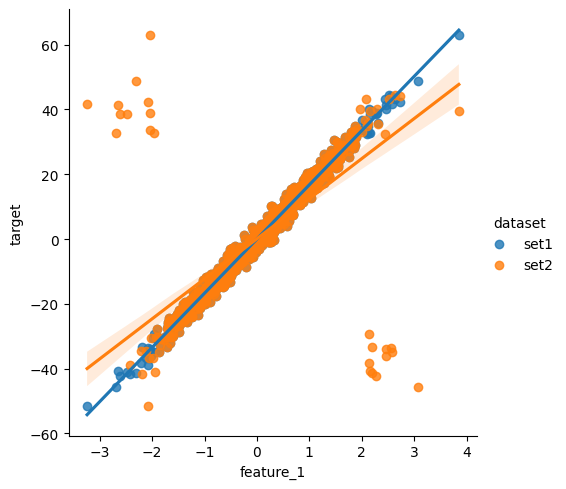

In [61]:
for x in range(10, 100, 5):
    df_outlier_outlayer_false = generate_outliers(df,['feature_1'], percentage = x/100, extreme_outlier = False, two_tailed= True)
    sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                    df_outlier_outlayer_false.assign(dataset = 'set2')]),
                    x = 'feature_1',
                    y = 'target',
                    hue = 'dataset')

## Tercera Parte (Clase 5, 6 y 7)

La ultima parte la van a poder encontrar en el archivo `template_tp_integrador_tercera_parte.ipynb`